# Analysis
In this notebook we will prepare the preprocessed data for analysis by creating epochs. 

## Setting up Python
First of all, we need to make sure that we are working in the `env` environment.


1. Run `bash env_to_ipynb_kernel.sh` from the `EEG` folder if you have not already done so. This will make sure that the `env` environment is available as a kernel in this notebook.

2. Press `Select Kernel`, then `Jupyter kernel...` and select `env`. If `env` does not show up, press the little refresh symbol!

**Note:** You might have to install the Jupyter extension for VScode to be able to select the kernel.

In [1]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Load the epochs data

In [4]:
input_path = os.path.join(os.getcwd(), 'epochs')
filename = "epochs-epo.fif"

epochs = mne.read_epochs(os.path.join(input_path, filename), preload=True)

Reading /work/LauraBockPaulsen#1941/CogNeuro24/EEG/day1/epochs/epochs-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     496.00 ms
        0 CTF compensation matrices available
Not setting metadata
297 matching events found
No baseline correction applied
0 projection items activated


# ERP analysis
Now that the data is epoched and resampled, we can start to analyse the data. 

**Group the epochs by modality (i.e. visual and auditory)**

*Hint: See this [link](https://mne.tools/stable/auto_tutorials/epochs/10_epochs_overview.html#subselecting-epochs) on how to subselect epochs*

In [7]:
visual_epochs = epochs['visual']
auditory_epochs = epochs['auditory']

**Now use the plot_image() method of the Epochs class to plot the channel 'EEG 021' for both auditory and visual epochs**

These plots show each epoch as one row of the image map for the chosen channel, with color representing signal magnitude. The average evoked response and the sensor location are shown below the image. This gives us an idea of whether there is consistency in the signal.

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


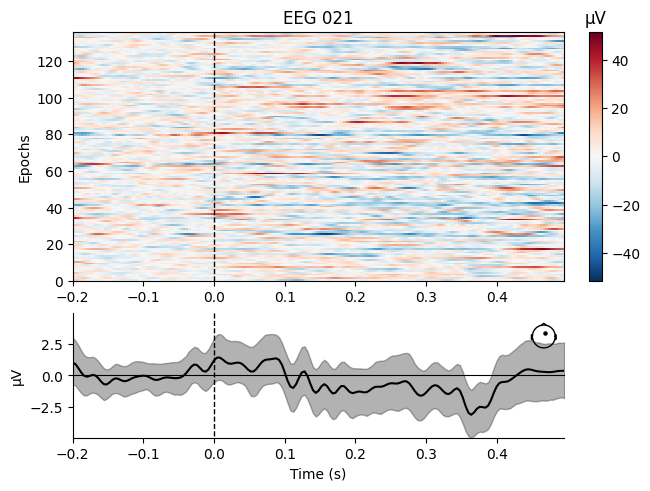

Not setting metadata
131 matching events found
No baseline correction applied
0 projection items activated


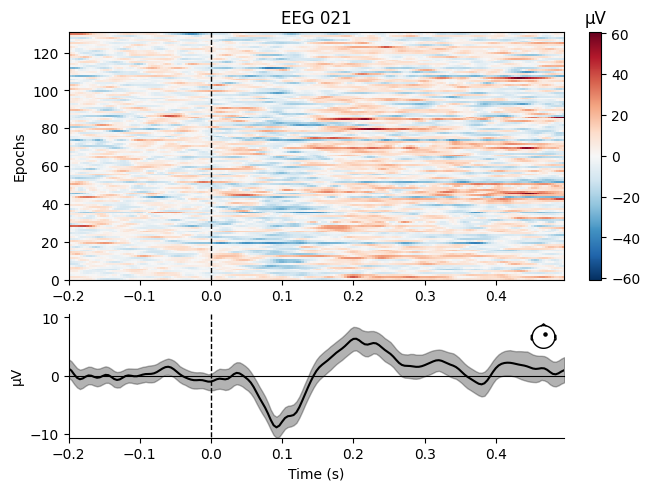

In [13]:
visual_epochs.plot_image(picks=['EEG 021']);
auditory_epochs.plot_image(picks=['EEG 021']);

### Questions
**Q:** In your view, which is the most consistent signal of the two? Why do you think that is? (*hints: where is the EEG 021 channel located on the scalp? Try using plot_sensors and flagging show_names=True*). **A:**

**Q:** Which channel would you choose if you were to reverse the pattern of the signal consistencies? Why? Try it out! **A:**

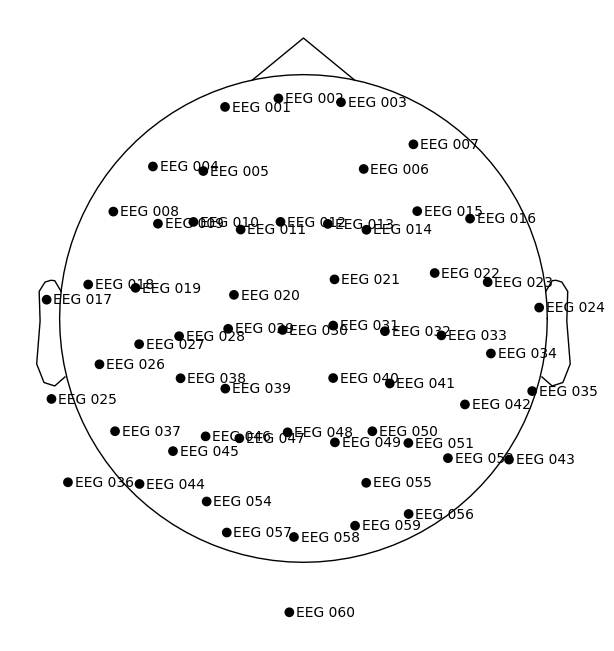

In [10]:
# plot the sensor locations
epochs.plot_sensors(show_names=True);

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


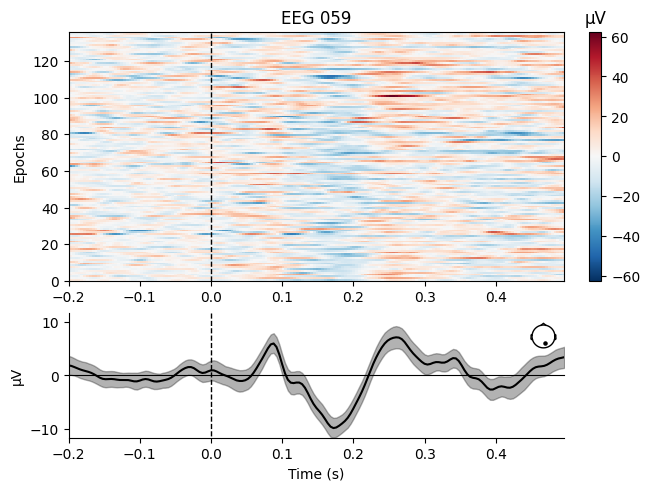

Not setting metadata
131 matching events found
No baseline correction applied
0 projection items activated


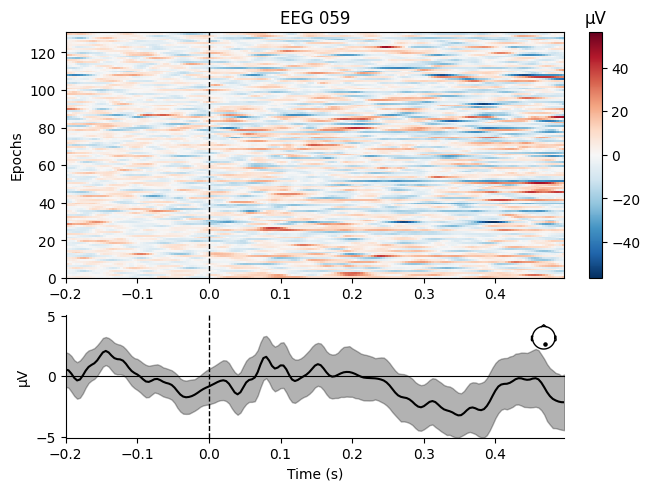

In [12]:
visual_epochs.plot_image(picks=['EEG 059']);
auditory_epochs.plot_image(picks=['EEG 059']);

## Evoked responses
Unlike `Epochs`, which contain multiple trials that are each associated with a condition label (that is the event ID), `Evoked` objects are averages across trials for a single condition. Thus we have to create a separate `Evoked` object for each condition in our experiment.

**Create an Evoked object for each modality**

*Hint: use the average() method of the Epochs class*

In [14]:
evoked_visual = visual_epochs.average()
evoked_auditory = auditory_epochs.average()

**Compare the two evokeds**

*Hint: use mne.viz.plot_compare_evokeds()*

combining channels using "gfp"
combining channels using "gfp"


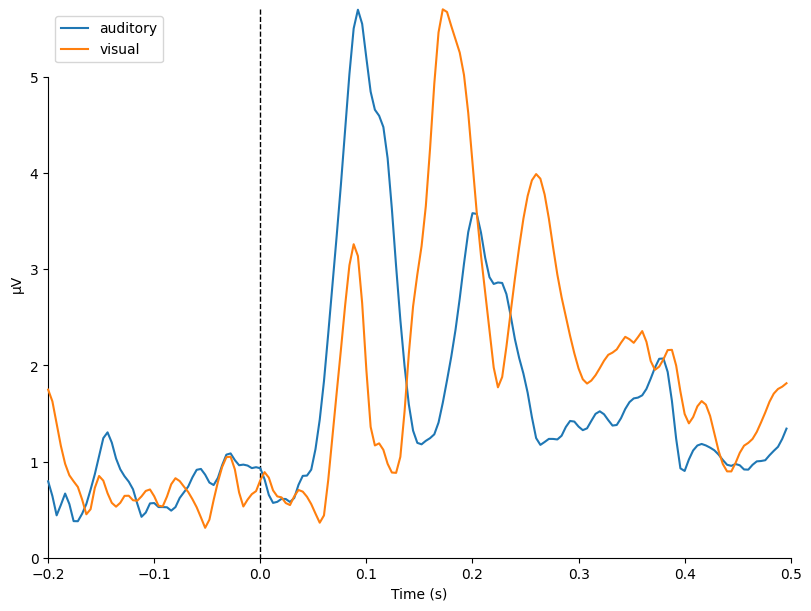

[<Figure size 800x600 with 1 Axes>]

In [16]:
mne.viz.plot_compare_evokeds({"auditory":evoked_auditory, "visual":evoked_visual})



Lets have a closer look at these averaged responses, here visualised with the global field power (GFP). GFP is actually the same as taking the standard deviation across all channels in each time sample. This tells us in which timepoints we see the biggest difference between different channels, which in turn is indicative of some kind of (more or less) focal activity. 

### Questions
**Q:** Looking at the plot, where in time do is the standard deviation across all channels the highest for visual and auditory, respectively? **A:**


**Q:** Do those timepoints match any well-known components relevant in this context? (*hint: N100 and N170*) **A:**

**Now lets use the plot_joint() method of the Evoked class to plot the evoked responses for both modalities.**

This function generates a combination of “butterfly” plots (waveforms of all electrodes overlaid) and topographic maps

### Question
**Q:** Does these plots match your observations from the GFP-plots? **A:**



# Extra exercises

If you haven't had a go at artefact removal using ICA, now is the time to go back to the preprocessing notebook and try it out! Another option is to complete the extra exercises here!

### 1E. Contrasting the responses of visual stimuli presented to the left and right visual field
In the previous exercises we have contrasted the response from visual and auditory stimuli. Now we will contrast the responses from visual stimuli presented to the left and right visual field.

In [19]:
# STEP 1: create vis_left_epochs and vis_right_epochs
vis_left_epochs = epochs["visual/left"]
vis_right_epochs = epochs["visual/right"]

In [20]:
# STEP 2: create evoked_left and evoked_right
evoked_left = vis_left_epochs.average()
evoked_right = vis_right_epochs.average()

combining channels using "gfp"
combining channels using "gfp"


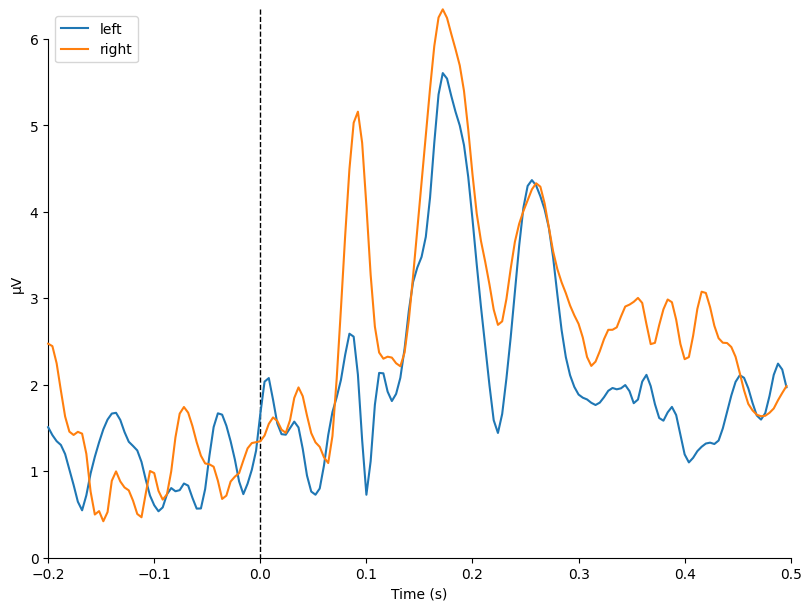

[<Figure size 800x600 with 1 Axes>]

In [21]:
# STEP 3: compare evoked responses for left vs. right visual stimuli
mne.viz.plot_compare_evokeds({"left":evoked_left, "right":evoked_right})

**Describe with a few sentences what the plot shows!**

**Now lets have a look at the topography of the difference between the two conditions.** 

Hint: use the plot_topomap() method of the Evoked class.

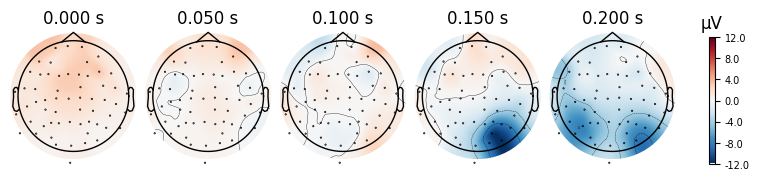

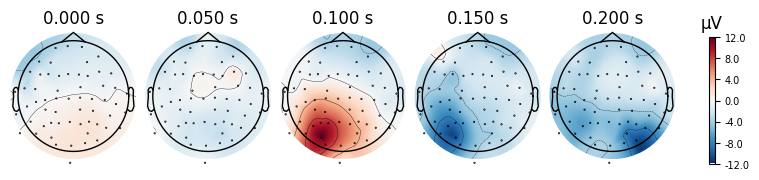

In [24]:
evoked_left.plot_topomap(times = np.linspace(0.0, 0.2, 5));
evoked_right.plot_topomap(times = np.linspace(0.0, 0.2, 5));

**Describe the difference in topography between the two conditions!**

### 2E. Contrasting the responses of auditory stimuli presented to the left and right ear
Do the same thing for auditory stimuli presented to the left and right ear!